In [250]:
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

large = 22; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 7),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

In [98]:
with open('all_idioms.json', 'r', encoding='UTF-8') as f:
    data = tuple(json.load(f))

abbrs = {'фам.', 'восторж.', 'погов.', 'греч. миф.', 'одобр.', 'библ.', 'публиц.', 'фр.', 'воен.', 'лат.', 'греч.', 'мор.', 'неодобрит.', 'неодобр.', 'перен.', 'жарг.', 'юр.', 'охот.', 'лит.', 'нар.-поэт.', 'груб.-прост.', 'грубо-прост.', 'шутл.', 'филос.', 'местоим.', 'театр.', 'ит.', 'детск.', 'протореч.', 'церк.', 'уст.', 'эт.', 'и т.п.', 'спец.', 'ист.', 'посл.', 'презр.', 'презрит.', 'устар.', 'англ.', 'груб.', 'эвфем.', 'простореч.', 'предосуд.', 'доревол.', 'канц.', 'церк.-слав.', 'еванг.', 'прост.', 'нар.- поэт.', 'экспрес.', 'миф.', 'нов.', 'нареч.', 'шахм.', 'высок.', 'нем.', 'поэт.', 'фамильярн.', 'рел.', 'араб.', 'книн.', 'этногр.', 'инф.', 'физ.', 'пориц.', 'торж.', 'шутл.-фамильярн.', 'ритор.', 'разг.', 'вульг.', 'Лит.', 'ирон.', 'бран.', 'др.-греч.', 'книжн.', 'офиц.', 'эвф.', 'шутл.-ирон.', 'пренебр.', 'народно-поэт.', 'истор.', 'обл.', 'фольк.', 'спорт.', 'уничиж.'}

86


In [103]:
abbrs = sorted(list(abbrs))

In [126]:
%%script false
df = pd.DataFrame(columns=['phrase', 'meaning', 'dictionary'] + sorted(list(abbrs)))
for phrase_dict in data:
    semantics_set = phrase_dict['semantics']
    for meaning_dict in semantics_set:
        if 'abbr' in list(meaning_dict.keys()) and 'dictionary' in list(meaning_dict.keys()):
            df.loc[len(df)] = [phrase_dict['phrase'],
                               meaning_dict['meaning'],
                               meaning_dict['dictionary']] + [True if abbr in meaning_dict['abbr'] else False for abbr in abbrs]

In [341]:
df.head(10)

,phrase,meaning,dictionary,Лит.,англ.,араб.,библ.,бран.,воен.,восторж.,...,шутл.-ирон.,шутл.-фамильярн.,эвф.,эвфем.,экспрес.,эт.,этногр.,юр.,label_counts,label_combinations
0,"['а вот на тебе!', 'и вот на тебе!']","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг., экспрес.)"
1,['а был ли мальчик?'],"Было ли что-либо в действительности, на самом деле? Выражение сомнения в подлинности чего-либо.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг., экспрес.)"
2,['а вот'],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(разг.,)"
3,"['а вот и нет', 'вот и нет']","Не выходит, нельзя сделать то, что намечается, предполагается.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг., экспрес.)"
4,['а ларчик просто открывался (открывается)'],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(ирон.,)"
5,"['а не то', 'не то']",NaN,Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(прост.,)"
6,"['а не то', 'не то']","Либо, или же.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(обл.,)"
7,"['а поди ж ты', 'поди ж ты']","Выражение изумления, восхищения, недоумения и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(прост., экспрес.)"
8,['а то бы вот'],"Могло произойти, случиться что-либо непредвиденное.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(разг.,)"
9,['а то как же'],"Да, конечно, непременно, разумеется.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг., экспрес.)"


In [128]:
%%script false
df.to_csv('dataframe.csv', sep=',', encoding='utf-8')

In [129]:
df = pd.read_csv('dataframe.csv', sep=',')

In [336]:
del df['Unnamed: 0']

In [337]:
description = df.describe()
description

,label_counts
count,31516.000000
mean,0.934668
std,0.820383
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31516 entries, 0 to 31515
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   phrase              31516 non-null  object
 1   meaning             22740 non-null  object
 2   dictionary          31516 non-null  object
 3   Лит.                31516 non-null  bool  
 4   англ.               31516 non-null  bool  
 5   араб.               31516 non-null  bool  
 6   библ.               31516 non-null  bool  
 7   бран.               31516 non-null  bool  
 8   воен.               31516 non-null  bool  
 9   восторж.            31516 non-null  bool  
 10  вульг.              31516 non-null  bool  
 11  высок.              31516 non-null  bool  
 12  греч.               31516 non-null  bool  
 13  греч. миф.          31516 non-null  bool  
 14  груб.               31516 non-null  bool  
 15  груб.-прост.        31516 non-null  bool  
 16  грубо-прост.        31

<AxesSubplot:title={'center':'Объем словарей'}, xlabel='dictionary'>

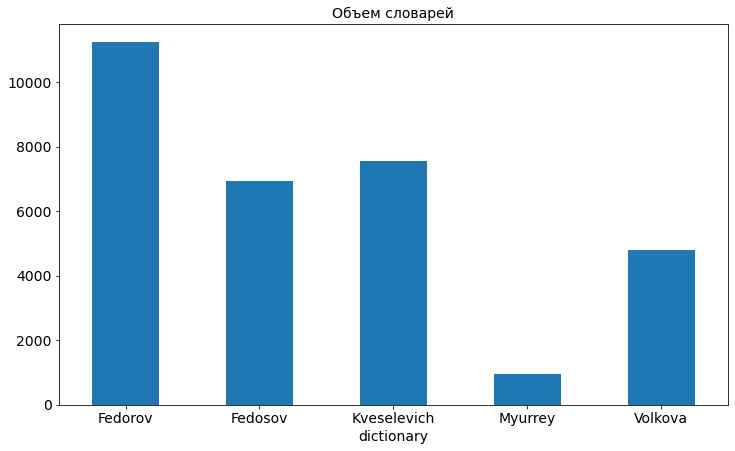

In [266]:
# Количество помет в каждом из словарей
pd.crosstab(df['phrase'], df['dictionary']).sum().plot(kind='bar',
                                                       rot=0,
                                                      title='Объем словарей')


In [314]:
# количество каждой из помет
labels_count = {}
for col in abbrs:
    if len(df[df[col]==True]) > 800:
        labels_count[col] = len(df[df[col]==True])
        print(col, len(df[df[col]==True]))

ирон. 1305
книжн. 1110
неодобр. 871
прост. 4872
разг. 7719
устар. 2785
экспрес. 4888


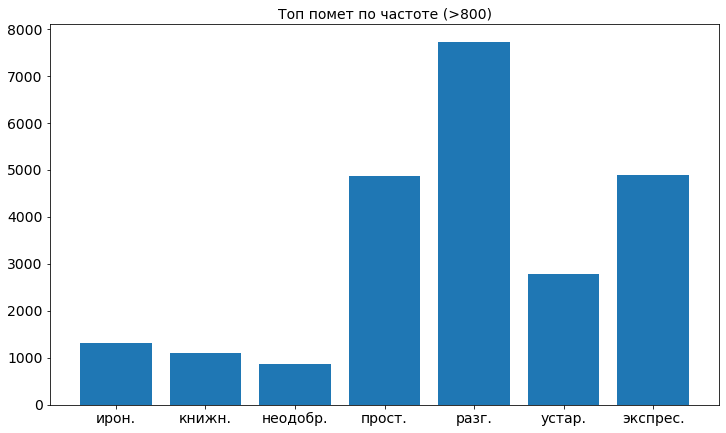

In [328]:
#plt.figure(figsize=(10, 7))
plt.bar(list(labels_count.keys()),list(labels_count.values()))
plt.title('Топ помет по частоте (>800)')
plt.show()

In [329]:
# распределение фраз по количеству помет
#create a column with a tuple of all idiom's labels
row_labels = []
label_combinations = []
for ind, row in df.loc[:, 'Лит.': 'юр.'].iterrows():
    row_labels.append(len(row[row].index))
    label_combinations.append(tuple(row[row].index))

df['label_counts'] = row_labels
df['label_combinations'] = label_combinations

In [279]:
df['label_combinations']

0         (разг., экспрес.)
1         (разг., экспрес.)
2                  (разг.,)
3         (разг., экспрес.)
4                  (ирон.,)
                ...        
31511             (перен.,)
31512              (разг.,)
31513         (нар.-поэт.,)
31514                    ()
31515    (простореч., фам.)
Name: label_combinations, Length: 31516, dtype: object

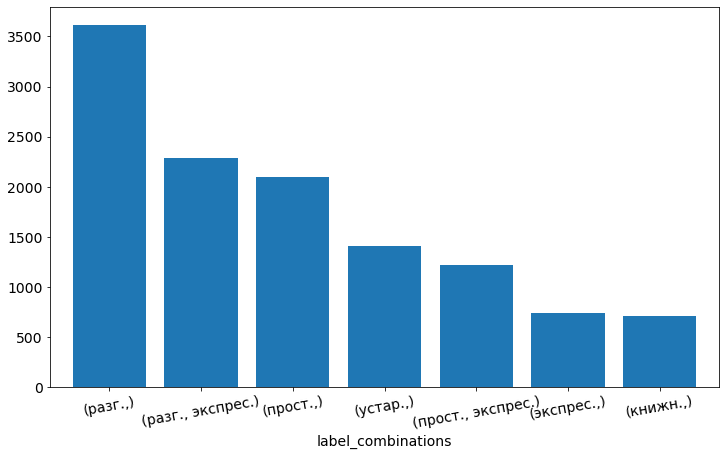

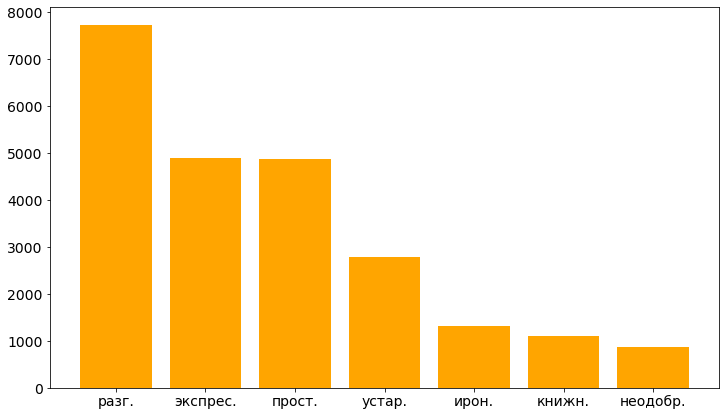

In [327]:
pd.crosstab(df['dictionary'], df['label_combinations']).sum()[1:].nlargest(7, keep='all').plot(kind='bar',
                                                                                            rot=10,
                                                                                            figsize=(12, 7),
                                                                                             width=0.8)
plt.show()

list_d = list(labels_count.items())
list_d.sort(key=lambda i: i[1], reverse=True)
plt.bar([k[0] for k in list_d], [k[1] for k in list_d], color='orange')
plt.show()

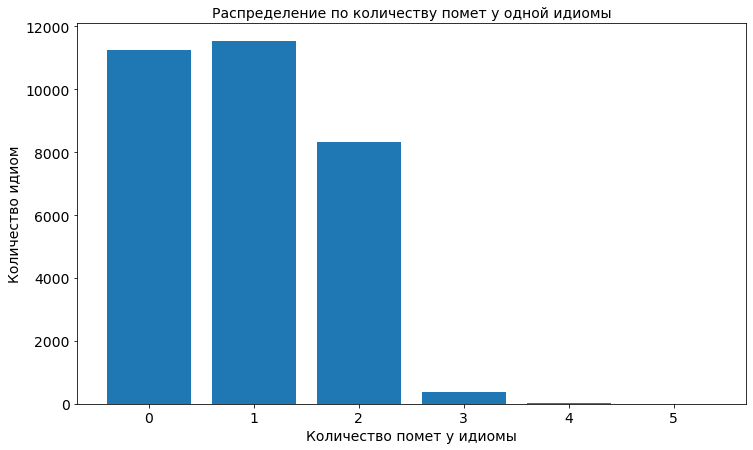

In [253]:
unique_label_counts = list(set(row_labels))
plt.bar(unique_label_counts, [row_labels.count(label_count) for label_count in unique_label_counts])
plt.xlabel('Количество помет у идиомы')
plt.ylabel('Количество идиом')
plt.title('Распределение по количеству помет у одной идиомы')
plt.show()

In [340]:
df[df['label_counts'] == 5]

,phrase,meaning,dictionary,Лит.,англ.,араб.,библ.,бран.,воен.,восторж.,...,шутл.-ирон.,шутл.-фамильярн.,эвф.,эвфем.,экспрес.,эт.,этногр.,юр.,label_counts,label_combinations
25743,['яко тать в нощи'],NaN,Kveselevich,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,5,"(библ., ирон., уст., церк., церк.-слав.)"


In [205]:
dicts = df['dictionary'].unique()

array(['Fedorov', 'Fedosov', 'Kveselevich', 'Myurrey', 'Volkova'],
      dtype=object)

Fedorov 100.0
Fedosov 13.589
Kveselevich 65.482
Myurrey 0.0
Volkova 65.273


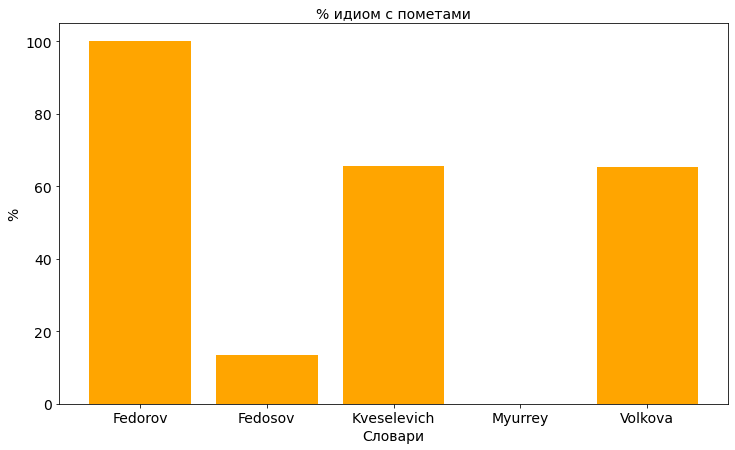

In [267]:
by_dictionary = df.groupby('dictionary')
labels_percent = {}
for dictionary in dicts:
    dict_group = by_dictionary.get_group(dictionary)
    total = len(dict_group)
    with_labels = len(dict_group['label_counts'][dict_group['label_counts'] > 0])
    
    labels_percent[dictionary] = round(with_labels / total * 100, 3)
    print(dictionary, labels_percent[dictionary])
    
plt.bar(list(labels_percent.keys()), list(labels_percent.values()), color='orange')
plt.xlabel('Словари')
plt.ylabel('%')
plt.title('% идиом с пометами')

plt.show()